# Data Exploration - Raster
## Imports

Wie bereits im Notebook DataExploration_Absolute_and_Relative_Endpoints beschrieben ist der Startpunkt nicht optimal. Der folgende Plot zeigt dies noch einmal.

In [123]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Helpers
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm

sns.set_style("whitegrid")
colors = {0:'tab:blue',1:'tab:orange',2:'tab:green'}

In [124]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

df = pd.read_pickle("data.pickle")

In [125]:
#Create a new Datafram for start and endpoints of spiral search only
start_end_points = Helpers.get_dataframe_for_start_end_points()

In [126]:
# Starting and endpoints of all runs - Spiral search only - relative (delta) values
start_end_points = Helpers.get_relative_start_end_points(df, start_end_points)

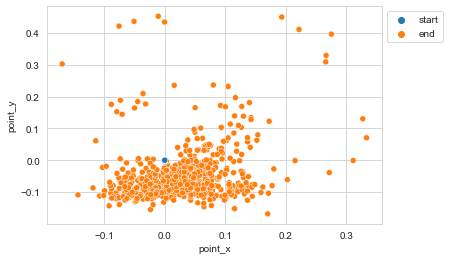

In [127]:
sns_plot = sns.scatterplot(data=start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

## Bestimmung des optimalen Startpunktes mithilfe von Rasterung
Im Folgenden werden wir den Bereich, in dem sich die relativen Endpunkte befinden, in einzelne Zellen unterteilen. Diese Zellen beinhalten anschließend eine Teilmenge der Endpunkte. Je nach größe dieser Teilmengen werden wir dann den Mittelpunkt derjenigen Zelle mit dem größten Wert, also mit den meisten darin befindlichen Endpunkten, als neuen Startpunkt definieren.

In [128]:
# Remove 'start' values
end_points = start_end_points[start_end_points['start_or_end'] == 'end']
x_vals = end_points['point_x'].values
y_vals = end_points['point_y'].values

max_y = start_end_points["point_y"].max()
min_y = start_end_points["point_y"].min()
min_x = start_end_points["point_x"].min()
max_x = start_end_points["point_x"].max()

#print(x_vals)
print(len(x_vals))
#print(y_vals)
print(len(y_vals))

624
624


In [129]:
def get_best_point(heatmap, xedges,yedges):
    i,j = np.unravel_index(heatmap.argmax(), heatmap.shape)
    x = (xedges[i] + xedges[i+1]) /2
    y = (yedges[j] + yedges[j+1]) / 2
    #print(heatmap[i,j])
    #print(i)
    #print(j)
    return x,y

In [130]:
def raster(bins):
    figure(figsize=(10, 10), dpi=80)

    heatmap, xedges, yedges = np.histogram2d(x_vals, y_vals, bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.clf()
    im = plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cm.OrRd)

    # Draw lines according to raster
    for i in  range(len(xedges)):
        plt.plot([xedges[i],xedges[i]],[min_y,max_y],'c--')
        plt.plot([min_x,max_x],[yedges[i],yedges[i]],'c--')

    plt.plot([0,0],[min_y,max_y],':y')
    plt.plot([min_x,max_x],[0,0],':y')

    # Get new Startpoint
    x,y = get_best_point(heatmap,xedges,yedges)

    #Plot old and new Startpoint
    plt.scatter(0, 0, s=100, color='lightblue')
    plt.scatter(x, y, s=100, color='blue')
    plt.grid(b=None)
    plt.colorbar(im)
    plt.show()

    print("Maximum Value:" + str(heatmap.max()))
    print("New Startpoint x: " + str(x) + ", y: " + str(y))

### Rasterung mit 5-facher Teilung

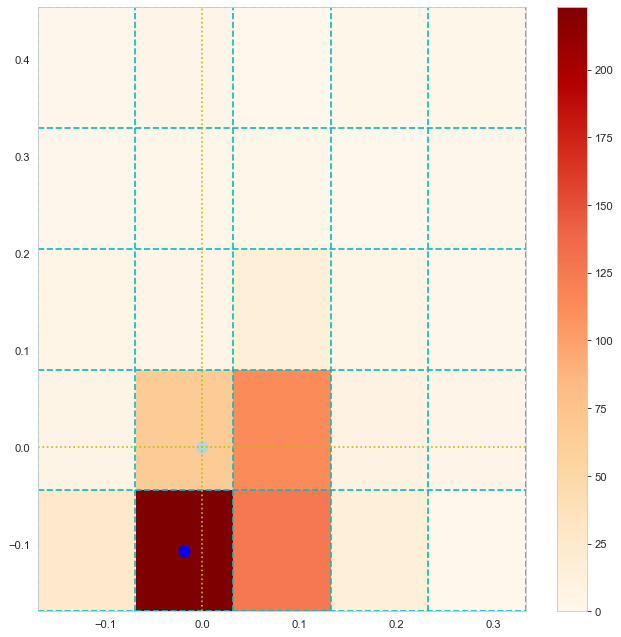

Maximum Value:223.0
New Startpoint x: -0.01861169999999923, y: -0.1066871999999762


In [131]:
# Raster with 5x5 (bins = 5)
raster(5)

### Rasterung mit 10-facher Teilung

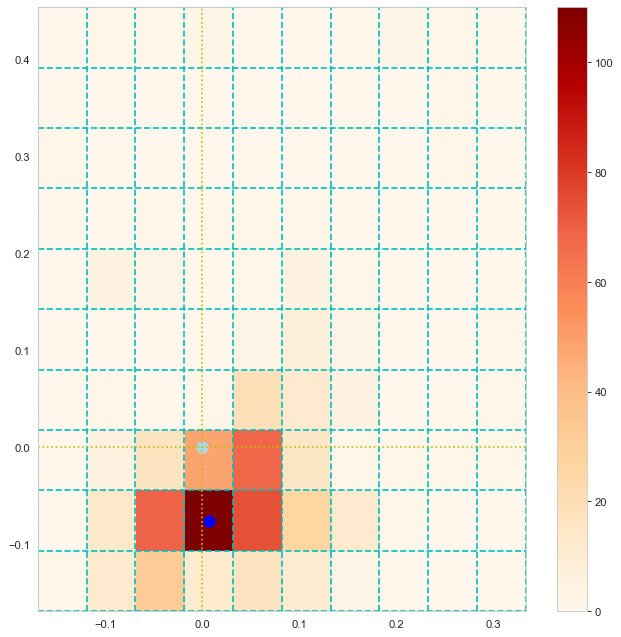

Maximum Value:110.0
New Startpoint x: 0.006517850000000713, y: -0.07558529999997746


In [132]:
# Raster with 10x10 (bins = 10)
raster(10)

### Rasterung mit 15-facher Teilung

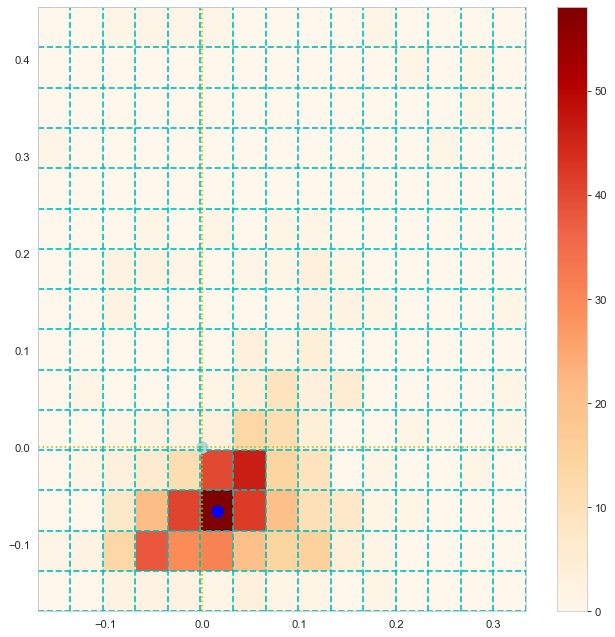

Maximum Value:58.0
New Startpoint x: 0.014894366666667352, y: -0.06521799999997788


In [133]:
# Raster with 15x15 (bins = 15)
raster(15)

### Rasterung mit 20-facher Teilung

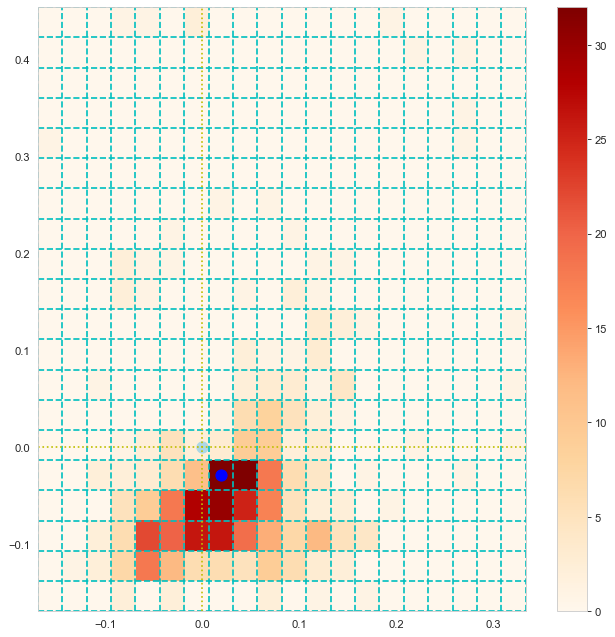

Maximum Value:32.0
New Startpoint x: 0.019082625000000686, y: -0.028932449999979327


In [134]:
# Raster with 20x20 (bins = 20)
raster(20)

Diese Plots zeigen, dass auch mit Hilfe der Rasterung neue Startwerte gefunden werden können. Ob dieses Verfahren verwendet werden kann um die Spiralsuche zu beschleunigen zeigt sich anschließend in der Evaluation.